In [1]:
%matplotlib inline
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from components.AttractorLayer import AttractorLayer
from components.RadarLoader import RadarLoader

seq_name = "2020-02-28-13-13-43"
%run carrada_utils/scripts/set_path.py 'components/carrada_datasets/'

In [2]:
data_loader = RadarLoader(seq_name)
data = data_loader.get_range_angle_stream_data(clip_and_normalize=True, resize=(64,64))
data_diff_normalized = data_loader.get_range_angle_stream_data_differentiated(clip_and_normalize=True, resize=(64,64))

In [3]:
TAU = 1  # TODO: I don't know whether this is important
INTENSITY =0.8
BETA =0.07  # TODO : Check this
SIGMA = 2.6 # TODO: Check this
SHIFT = 0.2 # TODO : Check this
CUTOFF_DIST = 20 # TODO : Change this
X_EYE = 10.0


K_INHIB = 3.0


In [4]:
attr_layer = AttractorLayer(
        tau=TAU,
        intensity=INTENSITY,
        cutoff_dist=CUTOFF_DIST,
        sigma=SIGMA,
        shift=SHIFT,
        beta=BETA,
        k=K_INHIB,
        clip=True,
        x_eye=X_EYE,
)

attr_layer.set_weights()
attr_layer.save_network(file_path="components/network_weights/9_net.npy")

#attr_layer.load_network(file_path="components/network_weights/with_clip.npy")

In [5]:
neuron_act = []
for data_entry in data_diff_normalized:
    neuron_act.append(
        attr_layer.forward_pass_visualization(
            data_entry.flatten(), number_of_passes=1
        )[0]
    )

In [6]:
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure()
# ax = plt.axes(xlim=(0, 64), ylim=(0, 64))
# #line, = ax.plot([], [], lw=2)
# im=plt.imshow(np.array(neuron_act[0]),interpolation='none')
# # initialization function: plot the background of each frame
# def init():
#     im.set_data(np.array(neuron_act[0]))
#     return [im]

# # animation function.  This is called sequentially
# def animate(i):
#     im.set_array(np.array(neuron_act[i]))
#     return [im]

# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=200, interval=1, blit=True)

# anim.save('basic_animation.gif', fps=10)#, extra_args=['-vcodec', 'libx264'])

# #plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


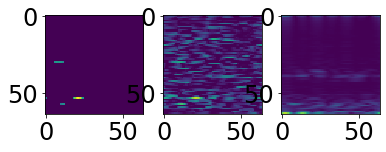

In [7]:

fig, (ax1, ax2, ax3)= plt.subplots(1, 3)

cell_act_map = ax1.imshow(np.array(neuron_act[0]), interpolation='none')
input_diff_map = ax2.imshow(np.array(data_diff_normalized[0]),interpolation='none')
input_map = ax3.imshow(np.array(data[0]), interpolation='none')

def init():
    cell_act_map.set_data(np.array(neuron_act[0]))
    input_diff_map.set_data(np.array(data_diff_normalized[0]))
    input_map.set_data(np.array(data[0]))
    return [cell_act_map, input_diff_map, input_map]

# animation function.  This is called sequentially
def animate(i):
    arr = neuron_act[i]/np.max(neuron_act[i])
    arr[arr < 0.4] = 0
    cell_act_map.set_data(np.array((arr)))
    input_diff_map.set_data(np.array(data_diff_normalized[i]))
    input_map.set_data(np.array(data[i]))
    return [cell_act_map, input_diff_map, input_map]


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=1, blit=True)

anim.save('animations/9_anim.gif', fps=10)


#fig.colorbar(cell_dists_map)

#plt.show()